<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/02_neural_netwrok_model_for_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usually There type fo classificaiton
1. Binary Classification
2. Multiclass classification
3. Multilabel Classification


In [ ]:
# Lets get the data for calssisfication

from sklearn.datasets import make_circles

In [ ]:
#samples 
n_samples=1000

#create data 
X,y = make_circles(n_samples,noise=0.03)


In [ ]:
X,y

(array([[ 0.77305874, -0.00501286],
        [-0.01579654,  0.8060414 ],
        [-0.28244498, -0.98336734],
        ...,
        [-0.09124294, -1.03060702],
        [-0.6494395 ,  0.41329351],
        [ 0.77112357, -0.25203721]]),
 array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 

In [ ]:
import pandas as pd
circle_data = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circle_data.head()

,X0,X1,Label
0,0.773059,-0.005013,1
1,-0.015797,0.806041,1
2,-0.282445,-0.983367,0
3,0.889246,0.478754,0
4,0.983142,0.198312,0


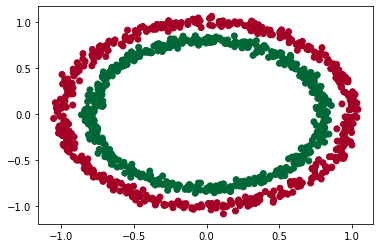

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn)

In [ ]:

X_data = circle_data.drop('Label', axis=1)
y_data = circle_data["Label"]

X_data.head(), y_data.head()

(         X0        X1
 0  0.773059 -0.005013
 1 -0.015797  0.806041
 2 -0.282445 -0.983367
 3  0.889246  0.478754
 4  0.983142  0.198312, 0    1
 1    1
 2    0
 3    0
 4    0
 Name: Label, dtype: int64)

In [ ]:

#Lets split the model for train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
len(X_train),len(X_test)

(800, 200)

In [ ]:


import tensorflow as tf

In [ ]:
# Lets create a model.
tf.random.set_seed(42)

# Create a model with one hidden layer
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)

])

# Comiple the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model.

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1317 - accuracy: 0.4775
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0533 - accuracy: 0.4475
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9980 - accuracy: 0.4412
Epoch 4/100
25/25 [==============================] - 0s 980us/step - loss: 3.9511 - accuracy: 0.4363
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9251 - accuracy: 0.4263
Epoch 6/100
25/25 [==============================] - 0s 979us/step - loss: 3.9149 - accuracy: 0.4238
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 3.8721 - accuracy: 0.4212
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 3.7792 - accuracy: 0.4175
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 3.6900 - accuracy: 0.4187
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 3.5981 - accuracy: 0.4175
Epoch

# what ??? Just 48 % accuracy.
  Need to add change hyper parameters

In [ ]:
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)

])

#compile a model

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# foit the model

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9804 - accuracy: 0.4588
Epoch 2/100
25/25 [==============================] - 0s 993us/step - loss: 3.8019 - accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 3.5612 - accuracy: 0.4775
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 3.2166 - accuracy: 0.4787
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 2.5142 - accuracy: 0.4800
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 1.0662 - accuracy: 0.4850
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7509 - accuracy: 0.4825
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7313 - accuracy: 0.4850
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7208 - accuracy: 0.4850
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7129 - accuracy: 0.4913
Epoch 1

In [ ]:
#Still 50 % lets add one more hidden layer of 100 neurons.
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 2.8536 - accuracy: 0.4625
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7112 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.5100
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4787
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.4800
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.4863
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.4650
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4938
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4575
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4938
Epoch 11/

In [ ]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4450


[0.7003436088562012, 0.4449999928474426]